# MAT281 - Laboratorio N°10

Nombre: Cristóbal Lobos

Rol: 201610519-0


<a id='p1'></a>
## I.- Problema 01


<img src="https://www.goodnewsnetwork.org/wp-content/uploads/2019/07/immunotherapy-vaccine-attacks-cancer-cells-immune-blood-Fotolia_purchased.jpg" width="360" height="360" align="center"/>


El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#visualizacion


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","BC.csv"), sep=",")
df['diagnosis'] = df['diagnosis'] .replace({'M':1,'B':0}) # target 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Basado en la información presentada responda las siguientes preguntas:

1. Realice un análisis exploratorio del conjunto de datos.
1. Normalizar las variables numéricas con el método **StandardScaler**.
3. Realizar un método de reducción de dimensionalidad visto en clases.
4. Aplique al menos tres modelos de clasificación distintos. Para cada uno de los modelos escogidos, realice una optimización de los hiperparámetros. además, calcule las respectivas métricas. Concluya.




### Parte 1: Análisis Exploratorio de Datos

In [3]:
df_describe = df.drop(['id','diagnosis'], axis = 1)
df_describe.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### Valores únicos y vacios

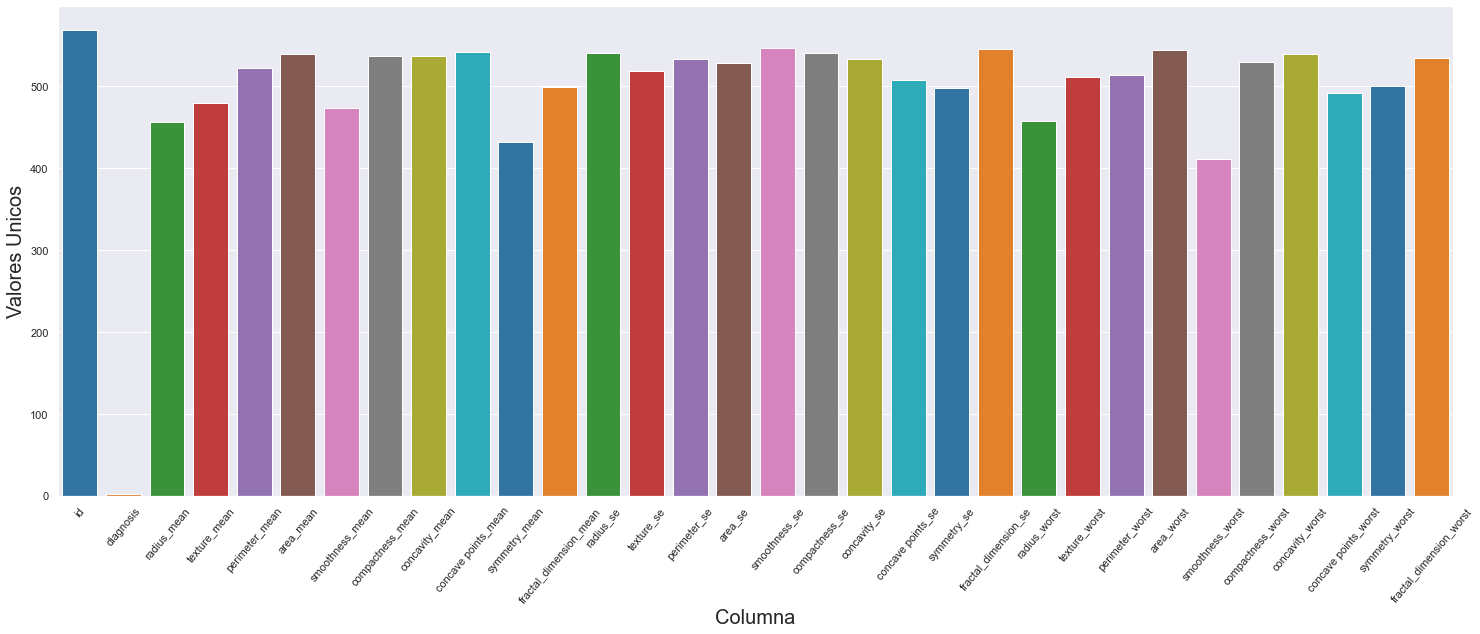

In [4]:
#Se trabaja por comodidad pasando la serie a un dataframe

df_aux = df.nunique().to_frame().reset_index() #Conteo de valores unicos
df_aux = df_aux.rename(columns = {'index':'Columna', 0:'Unicos'}) 
df_aux['NaN'] = df.isna().sum().to_frame().reset_index()[0] #Conteo de valores NaN
df_aux.head()


#Grafico de Valores unicos
plt.figure(figsize=(25, 9)) 
ax = sns.barplot(x="Columna", y="Unicos",palette="tab10", data=df_aux)
plt.xlabel("Columna", fontsize = 20) #etiquetas de los ejes
plt.ylabel("Valores Unicos", fontsize = 20)
plt.xticks(rotation=50)
plt.show()

Se puede observar que a excepción del diagnostico, la mayoría de los valores son únicos por columna

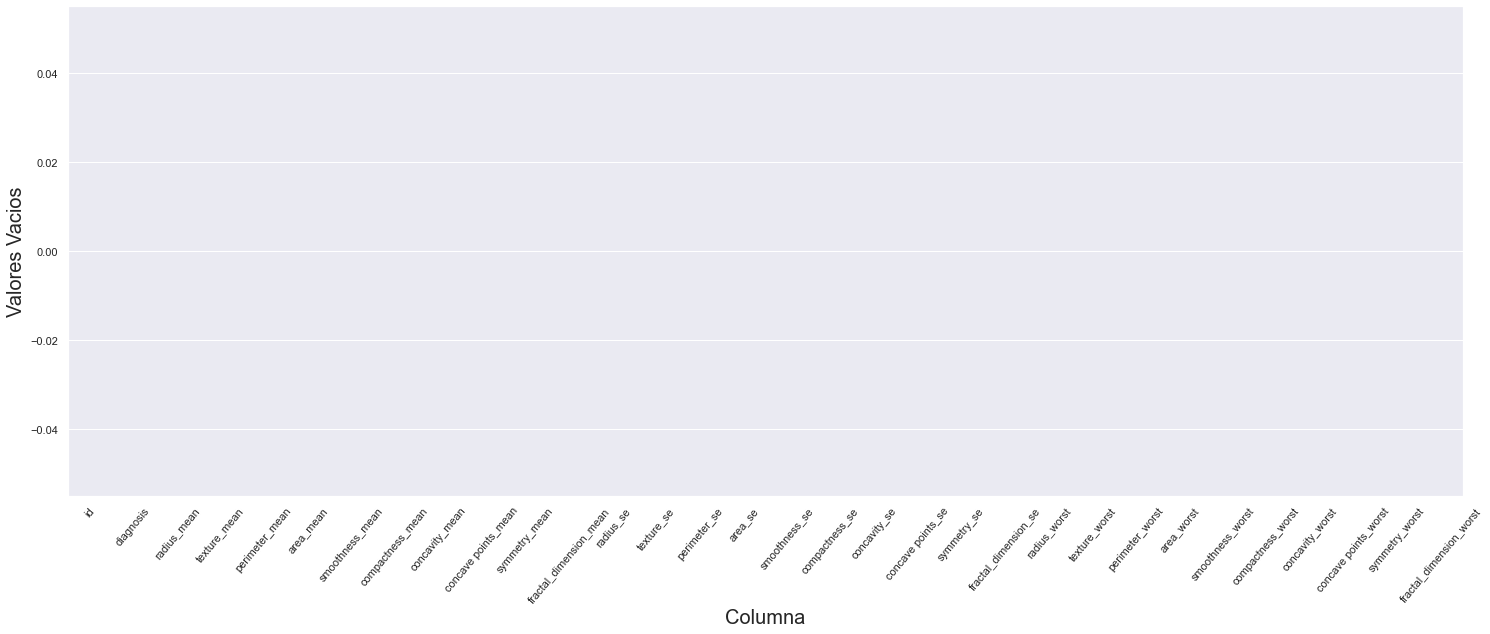

In [5]:
#Grafico de valores NaN
plt.figure(figsize=(25, 9))
ax = sns.barplot(x="Columna", y="NaN",palette="tab10", data=df_aux)
plt.xlabel("Columna", fontsize = 20) #etiquetas de los ejes
plt.ylabel("Valores Vacios", fontsize = 20)
plt.xticks(rotation=50)
plt.show()

No hay valores vacíos en los datos.

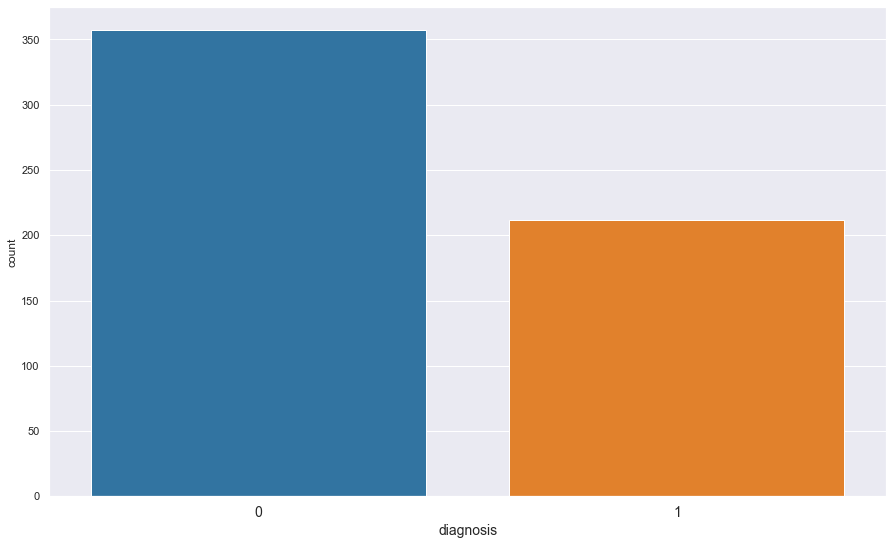

In [6]:
plt.figure(figsize=(15, 9)) #creacion grafico
ax = sns.countplot(x="diagnosis",palette="tab10", data=df)
plt.xlabel('diagnosis',fontsize = 14)
plt.xticks(fontsize=14)
plt.show()

Hay más información sobre tumor benignos que malignos en los datos.

### Reducción de dimensionalidad PCA

In [7]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [8]:
#Se normalizan los datos para realizar PCA mediante StandardScaler

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

j = 8 #Cantidad de atributos final
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components = j, svd_solver = 'randomized')) #Inicializamos nuestra función para pca
df_PCA = pd.DataFrame(pca_pipe.fit_transform(X)) #Filtramos los datos

df_PCA.columns = ["PC"+str(i+1) for i in range(j)] 

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

#Imprimimos las variancias del modelo PCA
percent_variance = np.round(modelo_pca.explained_variance_ratio_* 100, decimals =2)
percent_variance_cum = np.cumsum(percent_variance)
percent_variance_cum[0:j] 

array([42.86, 61.24, 70.39, 76.78, 82.1 , 86.08, 89.24, 91.41])

In [9]:
#Divimos la data ya filtrada por el PCA

from sklearn.model_selection import train_test_split

X = df_PCA

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)


print("X,y Shapes:", X.shape, y.shape)
print("X,y Train Shapes:", X_train.shape, Y_train.shape)
print("X,y Val Shapes:", x_val.shape, y_val.shape)
print("X,y Test Shapes:", x_test.shape, y_test.shape)

X,y Shapes: (569, 8) (569,)
X,y Train Shapes: (455, 8) (455,)
X,y Val Shapes: (364, 8) (364,)
X,y Test Shapes: (91, 8) (91,)


### Parte 3: Predicciones

In [10]:
#Librerias de metricas
from sklearn.metrics import f1_score as f1
from sklearn.metrics import roc_auc_score as AUROC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

Gridsearch es un Cross-Validation que selecciona los mejores hiperparámetros utilizando los datos de entrenamiento.

#### Modelo 1: Naive Bayes

In [11]:
from sklearn.ensemble import RandomForestClassifier

param_grid={'n_estimators':[150,200,250],'max_depth':[2,3,4,5]}
   
clf= GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
clf.fit(X_train, Y_train) 

v_val_1 = clf.predict(x_val)
v_test_1 = clf.predict(x_test)

print(clf.best_params_) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'max_depth': 5, 'n_estimators': 150}


#### Modelo 2: Regresion Logistica

In [12]:
from sklearn.linear_model import LogisticRegression

param_grid={"C":np.linspace(1,5,1), "penalty":["l1","l2"], "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
   
LR= GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
LR.fit(X_train, Y_train) 

v_val_2 = LR.predict(x_val)
v_test_2 = LR.predict(x_test)

print(LR.best_params_) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}


#### Modelo 3: SVC

In [13]:
from sklearn.svm import SVC

param_grid={'C':np.linspace(1,6,1), 'kernel':['linear', 'poly', 'rbf']}
   
SV= GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
SV.fit(X_train, Y_train) 

v_val_3 = SV.predict(x_val)
v_test_3 = SV.predict(x_test)

print(SV.best_params_) 

Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'C': 1.0, 'kernel': 'rbf'}


In [14]:
print('----------------------------------RESULTADOS-------------------------------------')
print('')
print('------------------------------------O--------------------------------------------')
print('Random Forest:')
print('')
print('Val F1:' + ' ' + ' ' +str(f1(y_val, v_val_1)))
print('Test F1:' + ' ' + ' ' +str(f1(y_test, v_test_1)))
print('')
print('Val AUROC:' + ' ' + ' ' +str(AUROC(y_val, v_val_1)))
print('Test AUROC:' + ' ' + ' ' +str(AUROC(y_test, v_test_1)))

print('---------------------------------O---------------------------------')

print('Regresion Logistica')
print(' ')
print('Val F1:' + ' ' + ' ' +str(f1(y_val, v_val_2)))
print('Test F1:' + ' ' + ' ' +str(f1(y_test, v_test_2)))
print('')
print('Val AUROC:' + ' ' + ' ' +str(AUROC(y_val, v_val_2)))
print('Test AUROC:' + ' ' + ' ' +str(AUROC(y_test, v_test_2)))

print('---------------------------------O---------------------------------')

print('SVC')
print(' ')
print('Val F1:' + ' ' + ' ' +str(f1(y_val, v_val_3)))
print('Test F1:' + ' ' + ' ' +str(f1(y_test, v_test_3)))
print('')
print('Val AUROC:' + ' ' + ' ' +str(AUROC(y_val, v_val_3)))
print('Test AUROC:' + ' ' + ' ' +str(AUROC(y_test, v_test_3)))

----------------------------------RESULTADOS-------------------------------------

------------------------------------O--------------------------------------------
Random Forest:

Val F1:  0.988593155893536
Test F1:  0.9411764705882353

Val AUROC:  0.9887218045112782
Test AUROC:  0.9444444444444444
---------------------------------O---------------------------------
Regresion Logistica
 
Val F1:  0.9774436090225563
Test F1:  0.9444444444444444

Val AUROC:  0.9822282980177717
Test AUROC:  0.954040404040404
---------------------------------O---------------------------------
SVC
 
Val F1:  0.9812734082397004
Test F1:  0.9577464788732395

Val AUROC:  0.9859876965140123
Test AUROC:  0.9631313131313131


En conclusión, el mejor modelo de los seleccionados fue el SVC.